<a href="https://colab.research.google.com/github/sergiomora03/AdvancedTopicsAnalytics/blob/main/notebooks/L11-IntroductionDeepLearningMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Deep Learning - MLP

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [Valerio Maggio](https://mpba.fbk.eu), Fondazione Bruno Kessler, [Alejandro Correa Bahnsen](albahnsen.com/) and [Jesus Solano](https://github.com/jesugome).

# Introduction to Deep Learning

Deep learning allows computational models that are composed of multiple processing **layers** to learn representations of data with multiple levels of abstraction.

These methods have dramatically improved the state-of-the-art in speech recognition, visual object recognition, object detection and many other domains such as drug discovery and genomics.

**Google DeepMind:** Ground-breaking AlphaGo masters the game of Go

[Google DeepMind Go Video](https://www.youtube.com/watch?v=SUbqykXVx0A)


**Google Assistant:** An artificial intelligence-powered virtual assistant

[Google Assistant Video](https://www.youtube.com/watch?v=-qCanuYrR0g)


**Research at NVIDIA:** The First Interactive AI Rendered Virtual World

[Nvidia New World Video](https://www.youtube.com/watch?v=ayPqjPekn7g)




## This Section will cover:

* Getting a conceptual understanding of multi-layer neural networks
* Training neural networks for image classification
* Implementing the powerful backpropagation algorithm
* Debugging neural network implementations

# Building Blocks: Artificial Neural Networks (ANN)

In machine learning and cognitive science, an artificial neural network (ANN) is a network inspired by biological neural networks which are used to estimate or approximate functions that can depend on a large number of inputs that are generally unknown

An ANN is built from nodes (neurons) stacked in layers between the feature vector and the target vector.

A node in a neural network is built from Weights and Activation function

An early version of ANN built from one node was called the **Perceptron**

<img src="https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/Perceptron.png" width="65%">

The Perceptron is an algorithm for supervised learning of binary classifiers. functions that can decide whether an input (represented by a vector of numbers) belongs to one class or another.

Much like logistic regression, the weights in a neural net are being multiplied by the input vertor summed up and feeded into the activation function's input.

A Perceptron Network can be designed to have *multiple layers*, leading to the **Multi-Layer Perceptron** (aka `MLP`)

<img src="https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/MLP.png" width="65%">

# Single Layer Neural Network

<img src="https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/single_layer.png" width="65%" />

_(Source: Python Machine Learning, S. Raschka)_

### Weights Update Rule

- We use a **gradient descent** optimization algorithm to learn the _Weights Coefficients_ of the model.
<br><br>
- In every **epoch** (pass over the training set), we update the weight vector $w$ using the following update rule:

$$
w = w + \Delta w, \text{where } \Delta w = - \eta \nabla J(w)
$$

<br><br>

In other words, we computed the gradient based on the whole training set and updated the weights of the model by taking a step into the **opposite direction** of the gradient $ \nabla J(w)$.

In order to fin the **optimal weights of the model**, we optimized an objective function (e.g. the Sum of Squared Errors (SSE)) cost function $J(w)$.

Furthermore, we multiply the gradient by a factor, the learning rate $\eta$ , which we choose carefully to balance the **speed of learning** against the risk of overshooting the global minimum of the cost function.

### Gradient Descent

In **gradient descent optimization**, we update all the **weights simultaneously** after each epoch, and we define the _partial derivative_ for each weight $w_j$ in the weight vector $w$ as follows:

$$
\frac{\partial}{\partial w_j} J(w) = \sum_{i} ( y^{(i)} - a^{(i)} )  x^{(i)}_j
$$

**Note**: _The superscript $(i)$ refers to the i-th sample. The subscript $j$ refers to the j-th dimension/feature_


Here $y^{(i)}$ is the target class label of a particular sample $x^{(i)}$ , and $a^{(i)}$ is the **activation** of the neuron

(which is a linear function in the special case of _Perceptron_).

We define the **activation function** $\phi(\cdot)$ as follows:

$$
\phi(z) = z = a = \sum_{j} w_j x_j = \mathbf{w}^T \mathbf{x}
$$

### Binary Classification

While we used the **activation** $\phi(z)$ to compute the gradient update, we may use a **threshold function** _(Heaviside function)_ to squash the continuous-valued output into binary class labels for prediction:

$$
\hat{y} =
\begin{cases}
    1 & \text{if } \phi(z) \geq 0 \\
    0 & \text{otherwise}
\end{cases}
$$

## Building Neural Nets from scratch


### Idea:

We will build the neural networks from first principles.
We will create a very simple model and understand how it works. We will also be implementing backpropagation algorithm.

**Please note that this code is not optimized and not to be used in production**.

This is for instructive purpose - for us to understand how ANN works.

Libraries like `theano` have highly optimized code.

### Perceptron

If you want a sneak peek of alternate (production ready) implementation of _Perceptron_ for instance try:
```python
from sklearn.linear_model import Perceptron
```

## Introducing the multi-layer neural network architecture

<img src="https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/multi-layers-1.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

Now we will see how to connect **multiple single neurons** to a **multi-layer feedforward neural network**; this special type of network is also called a **multi-layer perceptron** (MLP).

The figure shows the concept of an **MLP** consisting of three layers: one _input_ layer, one _hidden_ layer, and one _output_ layer.

The units in the hidden layer are fully connected to the input layer, and the output layer is fully connected to the hidden layer, respectively.

If such a network has **more than one hidden layer**, we also call it a **deep artificial neural network**.


### Notation

we denote the `ith` activation unit in the `lth` layer as $a_i^{(l)}$ , and the activation units $a_0^{(1)}$ and
$a_0^{(2)}$ are the **bias units**, respectively, which we set equal to $1$.
<br><br>
The _activation_ of the units in the **input layer** is just its input plus the bias unit:

$$
\mathbf{a}^{(1)} = [a_0^{(1)}, a_1^{(1)}, \ldots, a_m^{(1)}]^T = [1, x_1^{(i)}, \ldots, x_m^{(i)}]^T
$$
<br><br>
**Note**: $x_j^{(i)}$ refers to the jth feature/dimension of the ith sample

### Notes on Notation (usually) Adopted

The terminology around the indices (subscripts and superscripts) may look a little bit confusing at first.
<br><br>

You may wonder why we wrote $w_{j,k}^{(l)}$ and not $w_{k,j}^{(l)}$ to refer to
the **weight coefficient** that connects the *kth* unit in layer $l$ to the jth unit in layer $l+1$.
<br><br>

What may seem a little bit quirky at first will make much more sense later when we **vectorize** the neural network representation.
<br><br>

For example, we will summarize the weights that connect the input and hidden layer by a matrix
$$ W^{(1)} \in \mathbb{R}^{h×[m+1]}$$

where $h$ is the number of hidden units and $m + 1$ is the number of hidden units plus bias unit.

<img src="https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/multi-layers-2.png" width="75%" />

_(Source: Python Machine Learning, S. Raschka)_

## Forward Propagation

* Starting at the input layer, we forward propagate the patterns of the training data through the network to generate an output.

* Based on the network's output, we calculate the error that we want to minimize using a cost function that we will describe later.

* We backpropagate the error, find its derivative with respect to each weight in the network, and update the model.

### Sigmoid Activation

<img src="https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/logistic_function.png" width="65%" />

_(Source: Python Machine Learning, S. Raschka)_

<img src="https://raw.githubusercontent.com/sergiomora03/AdvancedMethodsDataAnalysisClass/68b4cc50f2cba5e389d7fa75afe7a5e658c38086/notebooks/images/fwd_step.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

<img src="https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/fwd_step_net.png" width="75%" />

_(Source: Python Machine Learning, S. Raschka)_

## Backward Propagation

The weights of each neuron are learned by **gradient descent**, where each neuron's error is derived with respect to it's weight.

<img src="https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/bkwd_step_net.png" width="75%" />

_(Source: Python Machine Learning, S. Raschka)_

Optimization is done for each layer with respect to the previous layer in a technique known as **BackPropagation**.

<img src="https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/backprop.png" width="%">

## Update Parameters

The weights of each neuron are learned by **gradient descent**, where each neuron's error is derived with respect to it's weight. The rule to update parameters is $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

<img src='https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/updateParameters.png'>

The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.

(*The following code is inspired from [these](https://github.com/dennybritz/nn-from-scratch) terrific notebooks*)

In [ ]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy

In [ ]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

# Let's implement our first MLP

 You are going to train a Neural Network with a single hidden layer.

**Here is our model**:
<img src="https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/classification_kiank.png" style="width:600px;height:300px;">

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows:
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc).
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

### Defining the neural network structure ####

Define three variables:
    - n_x: the size of the input layer
    - n_h: the size of the hidden layer
    - n_y: the size of the output layer


In [ ]:
def layer_sizes(X, Y, hidden_neurons):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)

    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0] # size of input layer
    n_h = hidden_neurons
    n_y = Y.shape[0] # size of output layer

    return (n_x, n_h, n_y)

### Initialize the model's parameters ####

**Exercise**: Implement the function `initialize_parameters()`.

**Instructions**:
- Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
- You will initialize the weights matrices with random values.
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vectors as zeros.
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

In [ ]:
# Solved Exercise: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """

    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.

    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros(shape=(n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros(shape=(n_y,1))

    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

### The Loop ####

**Question**: Implement `forward_propagation()`.

**Instructions**:
- Look above at the mathematical representation of your classifier.
- You can use the function `sigmoid()`. It is built-in (imported) in the notebook.
- You can use the function `np.tanh()`. It is part of the numpy library.
- The steps you have to implement are:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()`) by using `parameters[".."]`.
    2. Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set).
- Values needed in the backpropagation are stored in "`cache`". The `cache` will be given as an input to the backpropagation function.

In [ ]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)

    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)

    assert(A2.shape == (1, X.shape[1]))

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

def sigmoid(x):
    """
    Compute the sigmoid of x
    Arguments:
    x -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

Now that you have computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for every example, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

**Cost function**: Implement `compute_cost()` to compute the value of the cost $J$.

**Instructions**:
- There are many ways to implement the cross-entropy loss. To help you, we give you how we would have implemented
$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)                # no need to use a for loop!
```

(you can use either `np.multiply()` and then `np.sum()` or directly `np.dot()`).


In [ ]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)

    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2

    Returns:
    cost -- cross-entropy cost given equation (13)
    """

    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = np.multiply(Y,np.log(A2)) + np.multiply(1-Y,np.log(1-A2))
    cost = -1/m * np.sum(logprobs)

    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect.
                                # E.g., turns [[17]] into 17
    assert(isinstance(cost, float))

    return cost

Using the cache computed during forward propagation, you can now implement backward propagation.

**Backward Propagation**: Implement the function `backward_propagation()`.

**Instructions**:
Backpropagation is usually the hardest (most mathematical) part in deep learning. To help you, here again is the slide from the lecture on backpropagation. You'll want to use the six equations on the right of this slide, since you are building a vectorized implementation.  

<img src="https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/grad_summary.png" style="width:600px;height:300px;">

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- Tips:
    - To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So you can compute
    $g^{[1]'}(Z^{[1]})$ using `(1 - np.power(A1, 2))`.

In [ ]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.

    Arguments:
    parameters -- python dictionary containing our parameters
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]

    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]

    # Backward propagation: calculate dW1, db1, dW2, db2.
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2,A1.T)
    db2 = 1/m*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = 1/m* np.dot(dZ1,X.T)
    db1 = 1/m*np.sum(dZ1,axis=1,keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

### Update Parameters:

Implement the update rule. Use gradient descent. You have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

**General gradient descent rule**: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

**Illustration**: The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.

<img src="https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/sgd.gif" style="width:400;height:400;"> <img src="https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/sgd_bad.gif" style="width:400;height:400;">



In [ ]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients

    Returns:
    parameters -- python dictionary containing your updated parameters
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

### Integrate parts [Network structure ,Model Parameters, the loop] in nn_model() ####

Build your neural network model in `nn_model()`.

**Instructions**: The neural network model has to use the previous functions in the right order.

In [ ]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(3)
    n_x = layer_sizes(X, Y,n_h)[0]
    n_y = layer_sizes(X, Y,n_h)[2]

    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)

        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2,Y,parameters)

        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters,cache,X,Y)

        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters,grads)


        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

###  Predictions
Use your model to predict by building predict().
Use forward propagation to predict results.

**Reminder**: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    
As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: ```X_new = (X > threshold)```

In [ ]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X

    Arguments:
    parameters -- python dictionary containing your parameters
    X -- input data of size (n_x, m)

    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """

    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X,parameters)
    predictions = A2 > 0.5

    return predictions

## Test our MLP building blocks in real data

Note: This process will eventually result in our own Neural Networks class

It is time to run the model and see how it performs on a planar dataset. Run the following code to test your model with a single hidden layer of $n_h$ hidden units.

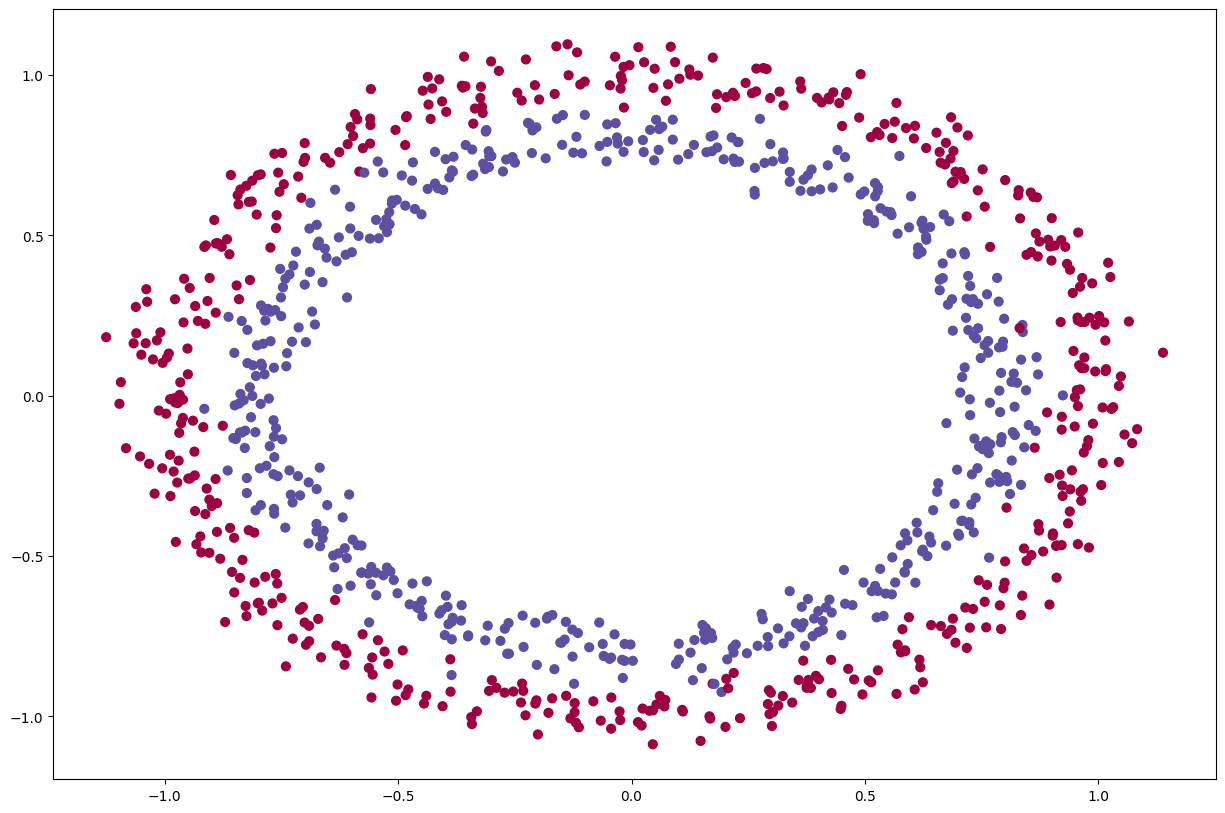

In [ ]:
from sklearn.datasets import make_circles

x_train, y_train = make_circles(n_samples=1000, noise= 0.05, random_state=3)
plt.figure(figsize=(15, 10))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

In [ ]:
def plot_decision_boundary(model, X, y):
    plt.figure(figsize=(15,10))
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), s=80, cmap=plt.cm.Spectral)

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.693146
Cost after iteration 2000: 0.693145
Cost after iteration 3000: 0.693145
Cost after iteration 4000: 0.693144
Cost after iteration 5000: 0.693144
Cost after iteration 6000: 0.693142
Cost after iteration 7000: 0.693114
Cost after iteration 8000: 0.537251
Cost after iteration 9000: 0.341078


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

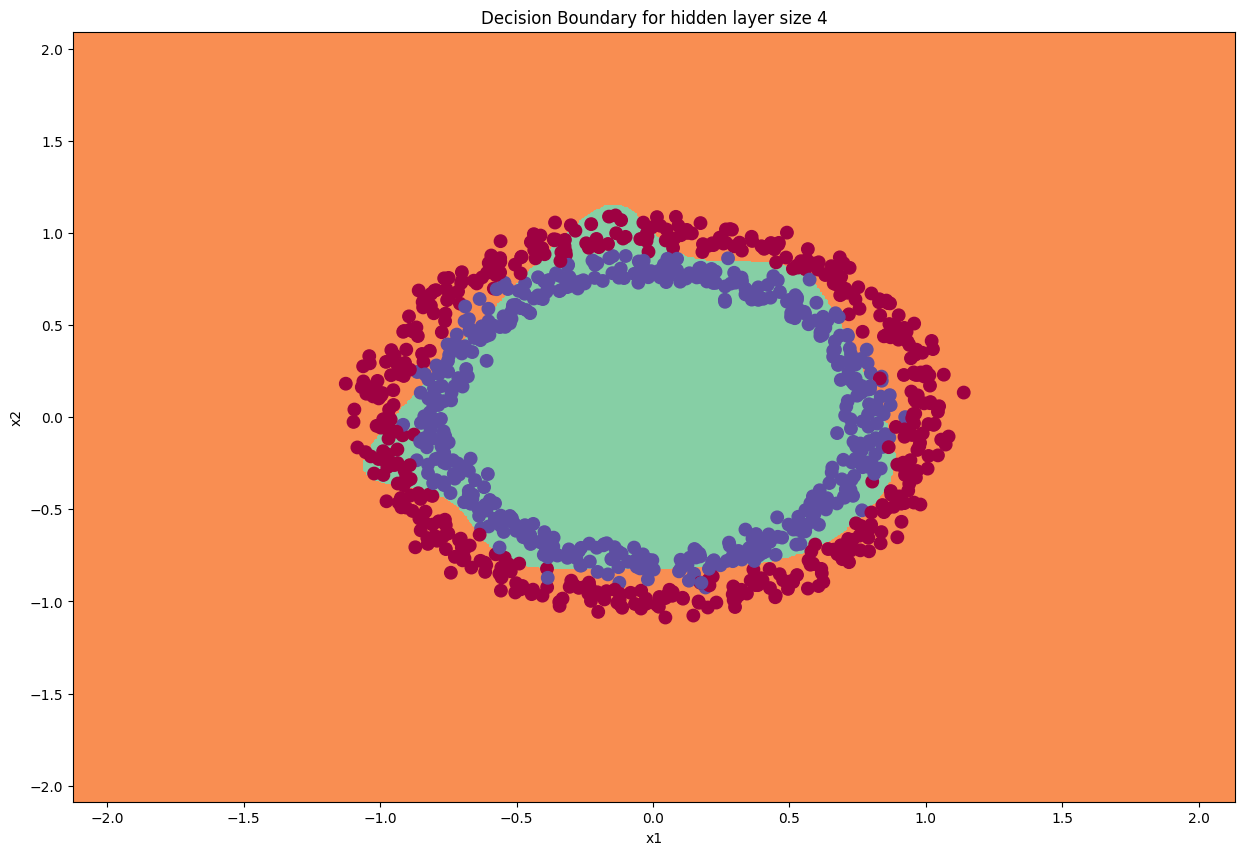

In [ ]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(x_train.T, np.array([y_train.T]), n_h = 5, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), x_train.T, np.array([y_train.T]))
plt.title("Decision Boundary for hidden layer size " + str(4))

**Expected Output**:

<table style="width:40%">
  <tr>
    <td>**Cost after iteration 9000**</td>
    <td> 0.218607 </td>
  </tr>
  
</table>


In [ ]:
# Print accuracy
predictions = predict(parameters, x_train.T)
print ('Accuracy: %d' % float((np.dot( np.array([y_train.T]),predictions.T) + np.dot(1- np.array([y_train.T]),1-predictions.T))/float( np.array([y_train.T]).size)*100) + '%')

Accuracy: 89%
